In [1]:
!pip install opendatasets

# load

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi

C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi


In [4]:
!pip install split-folders


In [5]:
'''import splitfolders
splitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog', output = 
                   'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data', 
                   seed = 42, ratio = (0.7, 0.3), group_prefix = None)'''

"import splitfolders\nsplitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog', output = \n                   'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data', \n                   seed = 42, ratio = (0.7, 0.3), group_prefix = None)"

In [6]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_cat_dir = os.path.join(train_dir, 'Cat')
train_dog_dir = os.path.join(train_dir, 'Dog')

test_cat_dir = os.path.join(test_dir, 'Cat')
test_dog_dir = os.path.join(test_dir, 'Dog')


In [7]:
print('Train_cat_dir :', os.listdir(train_cat_dir)[0:2])
print('Train_dog_dir :', os.listdir(train_dog_dir)[0:2])
print('Test_cat_dir :', os.listdir(test_cat_dir)[0:2])
print('Test_dog_dir :', os.listdir(test_dog_dir)[0:2])

Train_cat_dir : ['0.jpg', '1.jpg']
Train_dog_dir : ['0.jpg', '1.jpg']
Test_cat_dir : ['103.jpg', '104.jpg']
Test_dog_dir : ['1092.jpg', '1095.jpg']


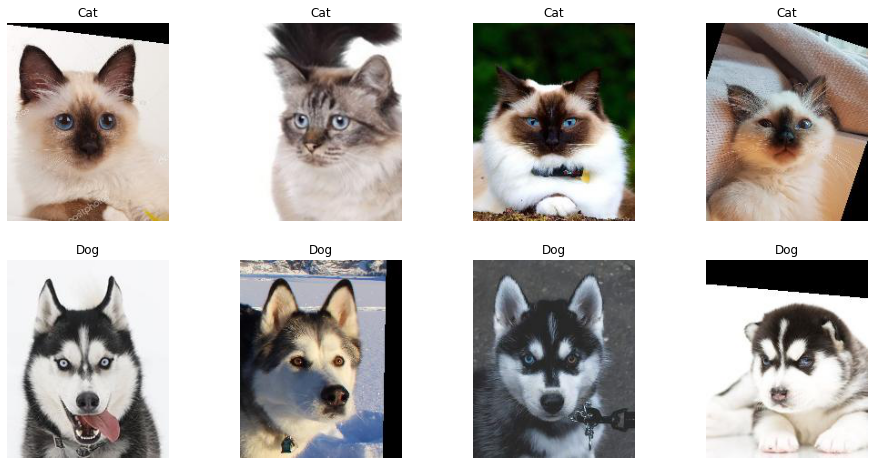

In [8]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
Train_cat = [os.path.join(train_cat_dir, fname) 
                for fname in os.listdir(train_cat_dir)[pic_index-4:pic_index]]

Train_dog = [os.path.join(train_dog_dir, fname) 
                for fname in os.listdir(train_dog_dir)[pic_index-4:pic_index]]
for i, img_path in enumerate(Train_cat+Train_dog):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [9]:
import cv2
import numpy as np

In [10]:
def load_dataset():
    train_data = []
    train_label = []
    test_data = []
    test_label = []
    
    for r, d ,f in os.walk(train_dir):
        for file in f:
            if ".jpg" in file:
                imagePath = os.path.join(r, file)
                image = cv2.imread(imagePath)
                image = cv2.resize(image, (100,100))
                train_data.append(image)
                label = imagePath.split(os.path.sep)[-2]
                train_label.append(label)

    for r, d ,f in os.walk(test_dir):
        for file in f:
            if ".jpg" in file:
                imagePath = os.path.join(r, file)
                image = cv2.imread(imagePath)
                image = cv2.resize(image, (100,100))
                test_data.append(image)
                label = imagePath.split(os.path.sep)[-2]
                test_label.append(label)
                
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    
    test_data = np.array(test_data)
    test_label = np.array(test_label)
    
    return train_data, train_label, test_data, test_label

In [11]:
train_data, train_label, test_data, test_label = load_dataset()
print("Train Data = ", str(train_data.shape))
print("Train Label = ", str(train_label.shape))
print("Test Data = ", str(test_data.shape))
print("Test Label = ", str(test_label.shape))

Train Data =  (2035, 100, 100, 3)
Train Label =  (2035,)
Test Data =  (200, 100, 100, 3)
Test Label =  (200,)


In [12]:
#Normalization dataset
print('Data sebelum di normalisasi :', train_data[0][0][0])
x_train = train_data.astype('float32')/255.0
x_test = test_data.astype('float32')/255.0
print('Data setelah di normalisasi :', x_train[0][0][0])

Data sebelum di normalisasi : [0 0 0]
Data setelah di normalisasi : [0. 0. 0.]


In [13]:
#Label Encoder 

from sklearn.preprocessing import LabelEncoder

print("Label Sebelum di encoder : ", train_label[1:5])


lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
print("Label Setelah di encoder : ", y_train[1:5])
print("Label Setelah di encoder : ", y_train[1:5])

Label Sebelum di encoder :  ['Cat' 'Cat' 'Cat' 'Cat']
Label Setelah di encoder :  [0 0 0 0]
Label Setelah di encoder :  [0 0 0 0]


# Modelling

In [14]:
'''import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Model

'''

'import tensorflow as tf\nfrom tensorflow.keras import layers\nfrom tensorflow.keras import models\nfrom tensorflow.keras import Model\n\n'

In [15]:
# Feature Extraction Layer
# Model 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(InputLayer(input_shape=[100, 100,3]))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides = 2))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid')) #Output Layer

# Print model summary
print(model.summary())

# Compile model

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2560128   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [16]:
#MODEL KE 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model2 = Sequential()

img_input = model2.add(InputLayer(input_shape=(100, 100,3)))
model2.add(Flatten(img_input))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(16, activation='relu'))

model2.add(Dense(1, activation='sigmoid')) #Output Layer

print(model2.summary())

# Compile model


model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 3,849,441
Trainable params: 3,849,441
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
from tensorflow.keras import layers
from tensorflow.keras import Model
# Model ke 3
img_input = layers.Input(shape=(100, 100, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 100x100x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
x = layers.Dense(64, activation='relu')(x) # hidden layer 2 dengan 64 neuron
x = layers.Dense(16, activation='relu')(x) # hidden layer 3 dengan 16 neuron

output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model3 = Model(img_input, output)
print(model3.summary())

model3.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 3,849,441
Trainable params: 3,849,441
Non-trainable params: 0
___________________________________________________

In [18]:
#from tensorflow.keras import models
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
102/102 [==============================] - 17s 157ms/step - loss: 0.3722 - acc: 0.8202 - val_loss: 0.0461 - val_acc: 0.9850
Epoch 2/15
102/102 [==============================] - 15s 143ms/step - loss: 0.0367 - acc: 0.9880 - val_loss: 0.0486 - val_acc: 0.9800
Epoch 3/15
102/102 [==============================] - 15s 147ms/step - loss: 0.0335 - acc: 0.9900 - val_loss: 0.0891 - val_acc: 0.9800
Epoch 4/15
102/102 [==============================] - 14s 138ms/step - loss: 0.0134 - acc: 0.9943 - val_loss: 0.0399 - val_acc: 0.9900
Epoch 5/15
102/102 [==============================] - 15s 149ms/step - loss: 0.0191 - acc: 0.9944 - val_loss: 0.0320 - val_acc: 0.9800
Epoch 6/15
102/102 [==============================] - 16s 152ms/step - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 7/15
102/102 [==============================] - 14s 139ms/step - loss: 0.0054 - acc: 0.9982 - val_loss: 0.0233 - val_acc: 0.9900
Epoch 8/15
102/102 [==============================] - 1

In [19]:
H2= model2.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
102/102 [==============================] - 3s 25ms/step - loss: 1.1098 - acc: 0.7254 - val_loss: 0.1127 - val_acc: 0.9600
Epoch 2/15
102/102 [==============================] - 2s 23ms/step - loss: 0.1248 - acc: 0.9546 - val_loss: 0.0671 - val_acc: 0.9900
Epoch 3/15
102/102 [==============================] - 2s 23ms/step - loss: 0.0998 - acc: 0.9672 - val_loss: 0.0674 - val_acc: 0.9900
Epoch 4/15
102/102 [==============================] - 2s 23ms/step - loss: 0.0887 - acc: 0.9692 - val_loss: 0.1201 - val_acc: 0.9550
Epoch 5/15
102/102 [==============================] - 2s 23ms/step - loss: 0.1207 - acc: 0.9533 - val_loss: 0.0711 - val_acc: 0.9800
Epoch 6/15
102/102 [==============================] - 2s 23ms/step - loss: 0.0644 - acc: 0.9783 - val_loss: 0.1465 - val_acc: 0.9550
Epoch 7/15
102/102 [==============================] - 2s 22ms/step - loss: 0.0992 - acc: 0.9762 - val_loss: 0.0721 - val_acc: 0.9800
Epoch 8/15
102/102 [==============================] - 2s 23ms/step - 

In [20]:
H3= model3.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
102/102 [==============================] - 3s 26ms/step - loss: 0.9353 - acc: 0.7122 - val_loss: 0.1248 - val_acc: 0.9600
Epoch 2/15
102/102 [==============================] - 2s 23ms/step - loss: 0.1149 - acc: 0.9561 - val_loss: 0.0681 - val_acc: 0.9900
Epoch 3/15
102/102 [==============================] - 2s 23ms/step - loss: 0.0792 - acc: 0.9760 - val_loss: 0.0759 - val_acc: 0.9900
Epoch 4/15
102/102 [==============================] - 2s 24ms/step - loss: 0.0901 - acc: 0.9639 - val_loss: 0.2721 - val_acc: 0.9050
Epoch 5/15
102/102 [==============================] - 2s 24ms/step - loss: 0.0626 - acc: 0.9783 - val_loss: 0.0817 - val_acc: 0.9750
Epoch 6/15
102/102 [==============================] - 2s 23ms/step - loss: 0.0661 - acc: 0.9796 - val_loss: 0.0661 - val_acc: 0.9850
Epoch 7/15
102/102 [==============================] - 2s 23ms/step - loss: 0.0867 - acc: 0.9725 - val_loss: 0.1817 - val_acc: 0.9450
Epoch 8/15
102/102 [==============================] - 3s 26ms/step - 

# Save Model

In [21]:
'''import json

target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/model'

# simpan history model pertama
history_dict = H.history
json.dump(history_dict, open(target_dir + '/model_pertama.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model_pertama.h5')
model.save_weights(target_dir + '/model_pertama_weights.h5')'''

"import json\n\ntarget_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/model'\n\n# simpan history model pertama\nhistory_dict = H.history\njson.dump(history_dict, open(target_dir + '/model_pertama.json', 'w'))\n\n# simpan model pertama dan weight-nya\nmodel.save(target_dir + '/model_pertama.h5')\nmodel.save_weights(target_dir + '/model_pertama_weights.h5')"

# Result Graph

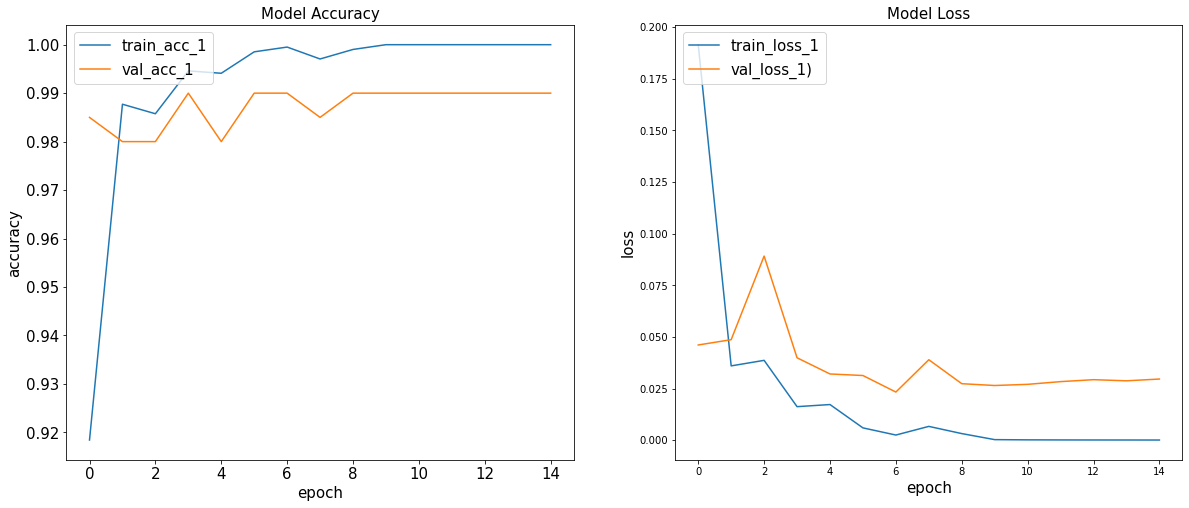

In [22]:
#Graph 1
plt.figure(figsize = (20,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 1) 
plt.plot(H.history['acc'],     label="train_acc_1")
plt.plot(H.history['val_acc'], label="val_acc_1")

plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
#plt.show()

#plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 2) 
plt.plot(H.history['loss'],    label="train_loss_1")
plt.plot(H.history['val_loss'], label="val_loss_1)")

plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

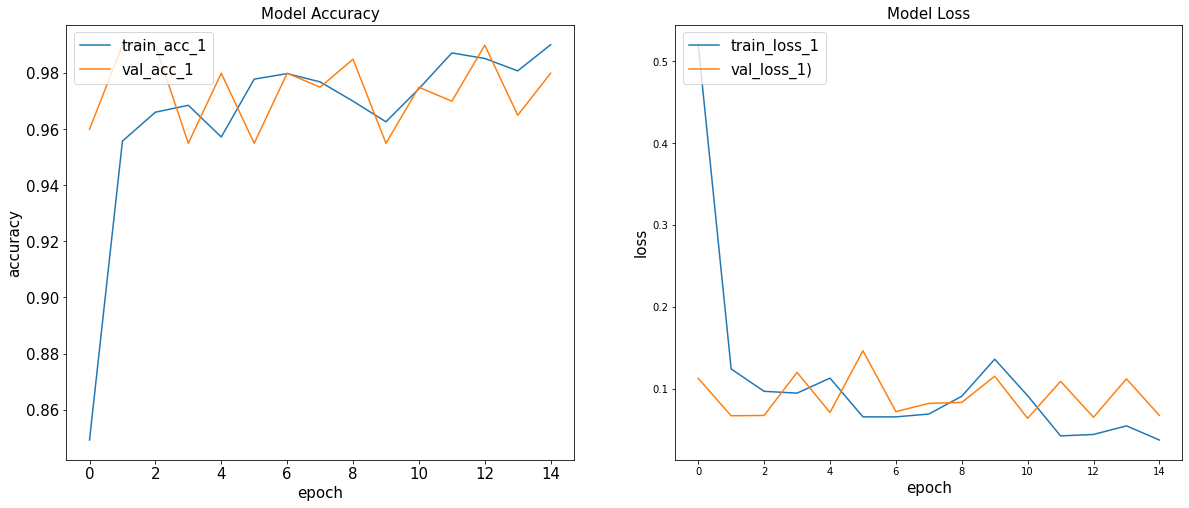

In [23]:
#Graph 2
plt.figure(figsize = (20,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 1) 
plt.plot(H2.history['acc'],     label="train_acc_1")
plt.plot(H2.history['val_acc'], label="val_acc_1")

plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
#plt.show()

#plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 2) 
plt.plot(H2.history['loss'],    label="train_loss_1")
plt.plot(H2.history['val_loss'], label="val_loss_1)")

plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

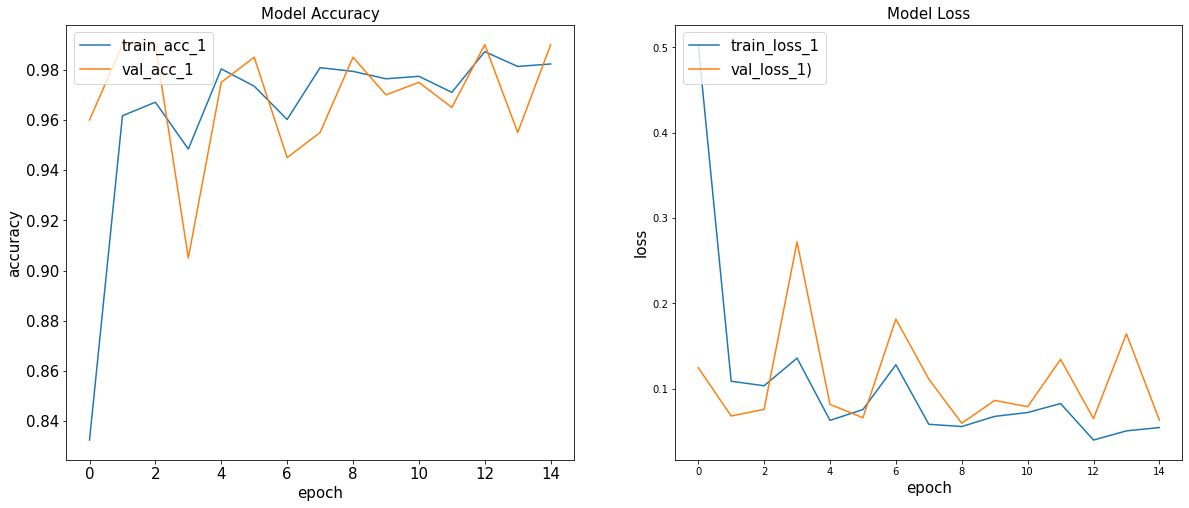

In [24]:
#Graph 3
plt.figure(figsize = (20,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 1) 
plt.plot(H3.history['acc'],     label="train_acc_1")
plt.plot(H3.history['val_acc'], label="val_acc_1")

plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
#plt.show()

#plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 2) 
plt.plot(H3.history['loss'],    label="train_loss_1")
plt.plot(H3.history['val_loss'], label="val_loss_1)")

plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

In [25]:
from sklearn.metrics import classification_report

#Predict model1
pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print('Model Pertama')
print(classification_report(y_test, labels))


Model Pertama
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.99      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [26]:
from sklearn.metrics import classification_report

#Predict model2
pred = model2.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print('Model Pertama')
print(classification_report(y_test, labels))


Model Pertama
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.97      0.99      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [27]:
from sklearn.metrics import classification_report

#Predict model3
pred = model3.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print('Model Pertama')
print(classification_report(y_test, labels))


Model Pertama
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.99      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



# Test Files

In [28]:
'''from tensorflow.keras.models import load_model

# load model pertama
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/model'
model_pertama = load_model(target_dir + '/model_pertama.h5')
'''

"from tensorflow.keras.models import load_model\n\n# load model pertama\ntarget_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/model'\nmodel_pertama = load_model(target_dir + '/model_pertama.h5')\n"

In [29]:
'''from tensorflow.keras.preprocessing import image

def pred_image_from_dir(img_dir, model_pertama):
    actual_class = img_dir.split(os.path.sep)

    img_ = image.load_img(img_dir, target_size=(3,3))
    imag = image.img_to_array(img_)
    imag = np.expand_dims(imag, axis=0)

    print(f'Actual class [\'{actual_class}\']')

    #prediksi model pertama
    pred = model_pertama.predict(imag)
    if pred[0][0] == 1:
        pred = 'cat'
    else:
        pred = 'dog'
    
    print('Hasil prediksi model 1')
    print("prediction class : ", pred)


    plt.imshow(img_)'''

'from tensorflow.keras.preprocessing import image\n\ndef pred_image_from_dir(img_dir, model_pertama):\n    actual_class = img_dir.split(os.path.sep)\n\n    img_ = image.load_img(img_dir, target_size=(3,3))\n    imag = image.img_to_array(img_)\n    imag = np.expand_dims(imag, axis=0)\n\n    print(f\'Actual class [\'{actual_class}\']\')\n\n    #prediksi model pertama\n    pred = model_pertama.predict(imag)\n    if pred[0][0] == 1:\n        pred = \'cat\'\n    else:\n        pred = \'dog\'\n    \n    print(\'Hasil prediksi model 1\')\n    print("prediction class : ", pred)\n\n\n    plt.imshow(img_)'

In [30]:
'''img_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data/train/testB/129.jpg'
pred_image_from_dir(img_dir, model_pertama)'''

"img_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data/train/testB/129.jpg'\npred_image_from_dir(img_dir, model_pertama)"

In [31]:
'''imge = cv2.imread('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data/train/testB/129.jpg')'''

"imge = cv2.imread('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data/train/testB/129.jpg')"

In [32]:
'''#4.2
# Hasil pengerjaan point bagian 4.2
'''from google.colab import files
uploaded2 = files.upload()'''


 
  # Prediksi Gambarpath = fn
    img = image.load_img(imge, target_size=(250,250))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    classes = model.predict(images, batch_size=8)
    classes2 = model2.predict(images, batch_size=8)
    print('Prediksi = ',classes[0][0])
  
  # Prediksi Gambar 
  # Benign 0 - <1 / Malignant >1
    if classes[0][0] >= 0 and classes[0][0] < 1:
        print('\nModel 1, Prediksi Gambar adalah Kucing)')
    else:
        print('Model 1, Prediksi Gambar adalah Anjing')
'''

SyntaxError: invalid syntax (<ipython-input-32-5b264814bf60>, line 3)